# Boulder, CO Housing Market Analysis

First, we will read in the csv data files from Zillow and put them into their own respective dataframes based on property type (for sale, for rent, or sold). We will also print out the number of records without any listed pricing data.

In [55]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [1]:
import pandas as pd
import glob

# Get a list of all CSV files in the directory
forRentFiles = glob.glob('zillow-property-listings-recent/zillow-properties-for-rent*.csv') 

# Create an empty list to store dataframes
df_list = [] 

# Loop over each CSV file and read it into a dataframe
for file in forRentFiles:
    df = pd.read_csv(file) 
    df_list.append(df) 

# Concatenate all dataframes into a single dataframe
forRentDF = pd.concat(df_list, ignore_index=True) 

# Print the final dataframe
display(forRentDF)
print("Number of listings without a listed rental price:",sum(forRentDF['Rental price (USD per month)'].isna()))

,Property URL,Property type,Rental price (USD per month),Living area,Living area unit,Price per living area unit (USD),Bedrooms,Bathrooms,Street address,City,Zip,State,Country
0,https://www.zillow.com/b/villas-condominiums-b...,Building,NaN,NaN,NaN,NaN,NaN,NaN,4415 Laguna Pl,Boulder,80303,CO,USA
1,https://www.zillow.com/homedetails/2850-Elm-Av...,Single Family,3300.0,1100.0,sqft,3.00,3.0,2.0,2850 Elm Ave,Boulder,80305,CO,USA
2,https://www.zillow.com/homedetails/130-S-Lashl...,Single Family,2995.0,NaN,NaN,NaN,3.0,1.0,130 S Lashley Ln,Boulder,80305,CO,USA
3,https://www.zillow.com/homedetails/365-30th-St...,Single Family,3200.0,1100.0,sqft,2.91,3.0,1.0,365 30th St,Boulder,80305,CO,USA
4,https://www.zillow.com/homedetails/1518-9th-St...,Single Family,4800.0,1300.0,sqft,3.69,3.0,2.0,1518 9th St,Boulder,80302,CO,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,https://www.zillow.com/b/1725-7th-st-boulder-c...,Building,NaN,NaN,NaN,NaN,NaN,NaN,1725 7th St,Boulder,80302,CO,USA
486,https://www.zillow.com/b/euclid-row-boulder-co...,Building,NaN,NaN,NaN,NaN,NaN,NaN,2995 Euclid Ave,Boulder,80303,CO,USA
487,https://www.zillow.com/b/cascade-apartments-bo...,Building,NaN,NaN,NaN,NaN,NaN,NaN,765 & 785 20th St,Boulder,80302,CO,USA
488,https://www.zillow.com/b/805-30th-st-boulder-c...,Apartment,5780.0,1295.0,sqft,4.46,4.0,4.0,805 30th St,Boulder,80303,CO,USA


Number of listings without a listed rental price: 127


View summary of the rentals dataset

In [2]:
forRentDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property URL                      490 non-null    object 
 1   Property type                     490 non-null    object 
 2   Rental price (USD per month)      363 non-null    float64
 3   Living area                       329 non-null    float64
 4   Living area unit                  329 non-null    object 
 5   Price per living area unit (USD)  329 non-null    float64
 6   Bedrooms                          363 non-null    float64
 7   Bathrooms                         363 non-null    float64
 8   Street address                    466 non-null    object 
 9   City                              490 non-null    object 
 10  Zip                               490 non-null    int64  
 11  State                             490 non-null    object 
 12  Country 

In [3]:
# Get a list of all CSV files in the directory
forSaleFiles = glob.glob('zillow-property-listings-recent/zillow-properties-for-sale*.csv') 

# Create an empty list to store dataframes
df_list = [] 

# Loop over each CSV file and read it into a dataframe
for file in forSaleFiles:
    df = pd.read_csv(file) 
    df_list.append(df) 

# Concatenate all dataframes into a single dataframe
forSaleDF = pd.concat(df_list, ignore_index=True) 

# Print the final dataframe
display(forSaleDF)
print("Number of listings without a listed sale price:",sum(forSaleDF['Property price (USD)'].isna()))

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Date listed (MM/DD/YYYY),Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),...,Price per living area unit (USD),Lot/land area,Lot/land area unit,Bedrooms,Bathrooms,Street address,City,Zip,State,Country
0,https://www.zillow.com/homedetails/1709-Alpine...,NaN,Condo for sale,Condominium,132,07/26/2024,989000,Yes,111000.0,10/16/2024,...,654.10,NaN,NaN,2.0,3.0,1709 Alpine Ave UNIT 6,Boulder,80304,CO,USA
1,https://www.zillow.com/homedetails/3300-Madiso...,NaN,Multi-family home for sale,Multi Family,133,07/25/2024,1900000,No,NaN,NaN,...,456.73,6640.00,sqft,8.0,4.0,3300 Madison Ave,Boulder,80303,CO,USA
2,https://www.zillow.com/homedetails/105-Million...,NaN,Lot / Land for sale,Lot/Land,133,07/25/2024,200000,No,NaN,NaN,...,NaN,5.95,acres,NaN,NaN,105 Millionaire Dr E,Boulder,80302,CO,USA
3,https://www.zillow.com/homedetails/1530-Lee-Hi...,NaN,Condo for sale,Condominium,133,07/25/2024,599000,Yes,26000.0,09/24/2024,...,649.67,NaN,NaN,2.0,2.0,1530 Lee Hill Dr UNIT 4,Boulder,80304,CO,USA
4,https://www.zillow.com/homedetails/2530-28th-S...,NaN,Townhouse for sale,Townhouse,134,07/24/2024,799500,No,NaN,NaN,...,617.85,0.82,acres,2.0,2.0,2530 28th Street Unit 118,Boulder,80301,CO,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,https://www.zillow.com/homedetails/5122-Willia...,NaN,Condo for sale,Condominium,128,07/30/2024,349000,Yes,11000.0,11/05/2024,...,258.52,NaN,NaN,3.0,2.0,5122 Williams Fork Trail Unit 201,Boulder,80301,CO,USA
351,https://www.zillow.com/homedetails/75-Sugarloa...,NaN,Lot / Land for sale,Lot/Land,128,07/30/2024,995000,No,NaN,NaN,...,NaN,21.05,acres,NaN,NaN,75 Sugarloaf Rd,Boulder,80302,CO,USA
352,https://www.zillow.com/homedetails/2949-Shady-...,NaN,Townhouse for sale,Townhouse,130,07/28/2024,559000,Yes,6000.0,09/30/2024,...,333.33,NaN,NaN,3.0,3.0,2949 Shady Hollow,Boulder,80304,CO,USA
353,https://www.zillow.com/homedetails/5110-Willia...,NaN,Townhouse for sale,Townhouse,132,07/26/2024,330000,Yes,28000.0,10/25/2024,...,367.89,NaN,NaN,2.0,2.0,5110 Williams Fork Trl UNIT 106,Boulder,80301,CO,USA


Number of listings without a listed sale price: 0


View summary of the for sale dataset

In [4]:
forSaleDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property URL                      355 non-null    object 
 1   MLS ID                            0 non-null      float64
 2   Listing description               355 non-null    object 
 3   Property type                     355 non-null    object 
 4   Number of days on Zillow          355 non-null    int64  
 5   Date listed (MM/DD/YYYY)          355 non-null    object 
 6   Property price (USD)              355 non-null    int64  
 7   Price was cut                     355 non-null    object 
 8   Price cut amount (USD)            155 non-null    float64
 9   Price cut date (MM/DD/YYYY)       155 non-null    object 
 10  Living area                       318 non-null    float64
 11  Living area unit                  318 non-null    object 
 12  Price pe

In [5]:
# Get a list of all CSV files in the directory
soldFiles = glob.glob('zillow-property-listings-recent/zillow-properties-sold*.csv') 

# Create an empty list to store dataframes
df_list = [] 

# Loop over each CSV file and read it into a dataframe
for file in soldFiles:
    df = pd.read_csv(file) 
    df_list.append(df) 

# Concatenate all dataframes into a single dataframe
soldDF = pd.concat(df_list, ignore_index=True) 

# Print the final dataframe
display(soldDF)
print("Number of listings without a listed property price:",sum(soldDF['Property price (USD)'].isna()))

,Property URL,MLS ID,Property type,Property price (USD),Sold date (MM/DD/YYYY),Living area,Living area unit,Price per living area unit (USD),Lot/land area,Lot/land area unit,Bedrooms,Bathrooms,Street address,City,Zip,State,Country
0,https://www.zillow.com/homedetails/703-Dellwoo...,NaN,Single Family,1150000,10/18/24,2029.0,sqft,566.78,8601.00,sqft,3.0,3.0,703 Dellwood Ave,Boulder,80304,CO,USA
1,https://www.zillow.com/homedetails/6095-Old-Br...,NaN,Single Family,1900000,10/18/24,4400.0,sqft,431.82,0.25,acres,5.0,4.0,6095 Old Brompton Rd,Boulder,80301,CO,USA
2,https://www.zillow.com/homedetails/3870-Campo-...,NaN,Single Family,1191400,10/18/24,3130.0,sqft,380.64,5381.00,sqft,3.0,4.0,3870 Campo Ct,Boulder,80301,CO,USA
3,https://www.zillow.com/homedetails/805-29th-St...,NaN,Condominium,605120,10/18/24,1426.0,sqft,424.35,NaN,NaN,3.0,2.0,805 29th Street Bldg N Unit 562,Boulder,80303,CO,USA
4,https://www.zillow.com/homedetails/3250-Oneal-...,NaN,Townhouse,362000,10/18/24,931.0,sqft,388.83,NaN,NaN,2.0,2.0,3250 Oneal Cir UNIT J-15,Boulder,80301,CO,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,https://www.zillow.com/homedetails/5540-Stonew...,NaN,Condominium,400000,10/21/24,859.0,sqft,465.66,NaN,NaN,2.0,2.0,5540 Stonewall Place Unit 16,Boulder,80303,CO,USA
488,https://www.zillow.com/homedetails/625-Manhatt...,NaN,Condominium,355000,10/21/24,819.0,sqft,433.46,NaN,NaN,2.0,2.0,625 Manhattan Pl UNIT 308,Boulder,80303,CO,USA
489,https://www.zillow.com/homedetails/2127-Fourmi...,NaN,Single Family,1450000,10/21/24,2786.0,sqft,520.46,1.96,acres,3.0,3.0,2127 Fourmile Canyon Dr,Boulder,80302,CO,USA
490,https://www.zillow.com/homedetails/350-17th-St...,NaN,Single Family,1540000,10/18/24,2689.0,sqft,572.70,10359.00,sqft,3.0,2.0,350 17th St,Boulder,80302,CO,USA


Number of listings without a listed property price: 0


View summary of the sold properties dataset

In [6]:
soldDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property URL                      492 non-null    object 
 1   MLS ID                            0 non-null      float64
 2   Property type                     492 non-null    object 
 3   Property price (USD)              492 non-null    int64  
 4   Sold date (MM/DD/YYYY)            492 non-null    object 
 5   Living area                       486 non-null    float64
 6   Living area unit                  486 non-null    object 
 7   Price per living area unit (USD)  486 non-null    float64
 8   Lot/land area                     350 non-null    float64
 9   Lot/land area unit                350 non-null    object 
 10  Bedrooms                          485 non-null    float64
 11  Bathrooms                         486 non-null    float64
 12  Street a

## Drop irrelevant columns

Let's remove the redundant and unnecessary columns from the datasets.

In [7]:
forRentDF.drop(['Property URL', 'Street address', 'Country'], axis=1, inplace=True)

forSaleDF.drop(['Property URL', 'MLS ID', 'Street address', 'Country'], axis=1, inplace=True)

soldDF.drop(['Property URL', 'MLS ID', 'Street address', 'Country'], axis=1, inplace=True)

## Statistical Summary of Numerical Variables

In [8]:
forRentDF.describe()

,Rental price (USD per month),Living area,Price per living area unit (USD),Bedrooms,Bathrooms,Zip
count,363.000000,329.000000,329.000000,363.000000,363.000000,490.000000
mean,3767.319559,1421.106383,2.938359,2.652893,1.953168,80302.175510
std,2199.108265,930.543896,1.061693,1.473771,1.035561,12.559462
min,700.000000,325.000000,0.750000,0.000000,0.000000,80026.000000
25%,2300.000000,750.000000,2.140000,2.000000,1.000000,80302.000000
50%,3200.000000,1152.000000,2.790000,2.000000,2.000000,80302.000000
75%,4500.000000,1725.000000,3.550000,3.000000,2.000000,80304.000000
max,16500.000000,5600.000000,7.400000,10.000000,6.000000,80305.000000


In [9]:
forSaleDF.describe()

,Number of days on Zillow,Property price (USD),Price cut amount (USD),Living area,Price per living area unit (USD),Lot/land area,Bedrooms,Bathrooms,Zip
count,355.000000,3.550000e+02,155.000000,318.000000,318.000000,225.000000,318.000000,318.000000,355.000000
mean,94.073239,1.536953e+06,81622.477419,2317.921384,633.817233,2471.829378,3.044025,2.811321,80303.383099
std,88.619833,1.820811e+06,149054.006012,1838.023401,298.208382,3556.808308,1.688132,1.616827,22.787144
min,0.000000,5.027500e+04,1.000000,396.000000,64.460000,0.250000,1.000000,1.000000,80026.000000
25%,41.000000,4.990000e+05,14500.000000,969.000000,447.392500,0.990000,2.000000,2.000000,80302.000000
50%,70.000000,9.650000e+05,26000.000000,1652.000000,578.360000,3.770000,3.000000,2.000000,80302.000000
75%,120.000000,1.795000e+06,100000.000000,3148.000000,784.482500,6281.000000,4.000000,4.000000,80304.000000
max,650.000000,1.500000e+07,1000000.000000,12582.000000,2312.140000,10761.000000,20.000000,13.000000,80503.000000


In [10]:
soldDF.describe()

,Property price (USD),Living area,Price per living area unit (USD),Lot/land area,Bedrooms,Bathrooms,Zip
count,4.920000e+02,486.000000,486.000000,350.000000,485.000000,486.000000,492.000000
mean,1.245959e+06,2227.870370,566.753786,3991.945571,3.111340,2.632202,80303.969512
std,1.200068e+06,1495.679685,400.788658,3807.677379,1.300022,1.302609,15.661292
min,4.700000e+04,360.000000,47.960000,0.250000,1.000000,0.000000,80301.000000
25%,5.700000e+05,1044.000000,401.740000,1.147500,2.000000,2.000000,80302.000000
50%,9.500000e+05,1908.500000,509.610000,4039.500000,3.000000,2.000000,80303.000000
75%,1.450000e+06,2992.750000,655.137500,7477.000000,4.000000,3.000000,80304.000000
max,1.000000e+07,14030.000000,7500.000000,10806.000000,8.000000,10.000000,80503.000000


Number of records for each dataset

In [11]:
# Create a dictionary with the dataframe names and their respective lengths
data = {
    'DataFrame': ['forRentDF', 'forSaleDF', 'soldDF'],
    'Number of Records': [len(forRentDF), len(forSaleDF), len(soldDF)]
}

# Convert the dictionary to a dataframe
df_records = pd.DataFrame(data)

# Display the dataframe
display(df_records)

,DataFrame,Number of Records
0,forRentDF,490
1,forSaleDF,355
2,soldDF,492


Median sale price for each of the datasets

In [12]:
# median sale price for sold properties
median_sold_price = soldDF['Property price (USD)'].median()

# median sale price for properties for sale
median_for_sale_price = forSaleDF['Property price (USD)'].median()

# median rental price for properties for rent
median_rental_price = forRentDF['Rental price (USD per month)'].median()

print(f"Median Sold Price: ${median_sold_price}")
print(f"Median For Sale Price: ${median_for_sale_price}")
print(f"Median Rental Price: ${median_rental_price}")

Median Sold Price: $950000.0
Median For Sale Price: $965000.0
Median Rental Price: $3200.0


Median listing home price/sq ft

In [14]:
# median listing home price/living area unit for sold properties
median_sold_price_per_area = soldDF['Price per living area unit (USD)'].median()

# median sale price for properties for sale
median_for_sale_price_per_area = forSaleDF['Price per living area unit (USD)'].median()

# median rental price for properties for rent
median_rental_price_per_area = forRentDF['Price per living area unit (USD)'].median()

print(f"Median Sold Price per Living Area: ${median_sold_price_per_area}")
print(f"Median For Sale Price per Living Area: ${median_for_sale_price_per_area}")
print(f"Median Rental Price per Living Area per Month: ${median_rental_price_per_area}")

Median Sold Price per Living Area: $509.61
Median For Sale Price per Living Area: $578.36
Median Rental Price per Living Area per Month: $2.79


Median rental sale price by bedrooms

In [19]:
# Group the rental data by number of bedrooms and calculate the median rental price for each group
median_rental_prices_by_bedrooms = forRentDF.groupby('Bedrooms')['Rental price (USD per month)'].median()

# Print the median rental prices by number of bedrooms
print(median_rental_prices_by_bedrooms)


Bedrooms
0.0      1545.0
1.0      1950.0
2.0      2525.0
3.0      3595.0
4.0      4800.0
5.0      6000.0
6.0      6300.0
7.0      8200.0
8.0      9950.0
9.0     13950.0
10.0    16500.0
Name: Rental price (USD per month), dtype: float64


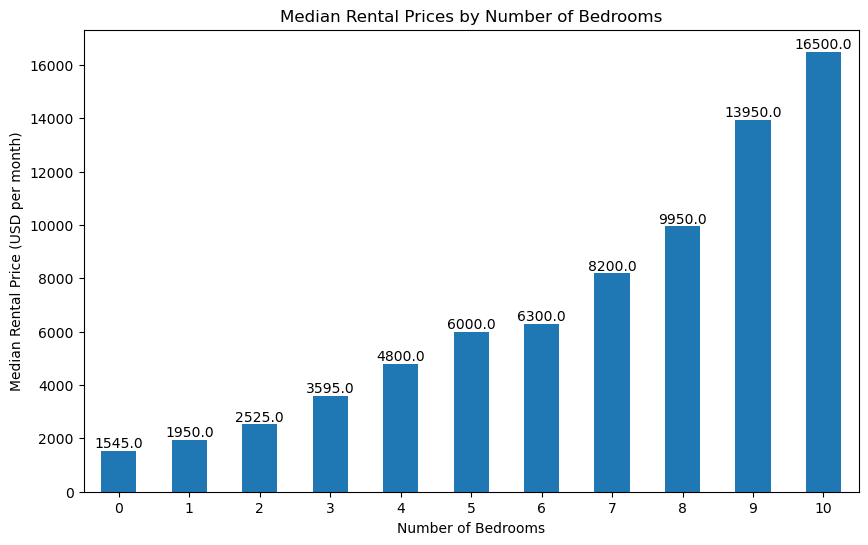

In [24]:
# Create a bar plot of the median rental prices by number of bedrooms
plt.figure(figsize=(10, 6))
median_rental_prices_by_bedrooms.plot(kind='bar')
plt.title('Median Rental Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Rental Price (USD per month)')
plt.xticks(rotation=0)

# Add the numbers on top of the bars
    # reference - copied code from Gemini AI by googling "how to display number on top of barchart in python"
    # for loop iterates over the price values
    # plt.text to add text over the desired positions - in this case we specify the x and y coordinates of the text
    # str(v) converts the price to a string
    # va='bottom' alignts the text vertically to the bottom
for i, v in enumerate(median_rental_prices_by_bedrooms.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Format x-axis labels to integers
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.show()

Median sale price by property type

In [44]:
# Group the for sale data by property type and calculate the median sale price for each group
median_sale_price_by_property_type = forSaleDF.groupby('Property type')['Property price (USD)'].median()

# Convert the result to a dataframe for better display
median_sale_price_by_property_type_df = median_sale_price_by_property_type.reset_index()

# Rename the columns and add comma formatting to the median sale price
median_sale_price_by_property_type_df.columns = ['Property Type', 'Median Sale Price (USD)']

median_sale_price_by_property_type_df['Median Sale Price (USD) Formatted'] = median_sale_price_by_property_type_df['Median Sale Price (USD)'].apply(lambda x: f'{x:,}')
# Display the dataframe
display(median_sale_price_by_property_type_df)

,Property Type,Median Sale Price (USD),Median Sale Price (USD) Formatted
0,Condominium,544500.0,"544,500.0"
1,Lot/Land,795000.0,"795,000.0"
2,Manufactured,91250.0,"91,250.0"
3,Multi Family,1900000.0,"1,900,000.0"
4,Single Family,1847500.0,"1,847,500.0"
5,Townhouse,543500.0,"543,500.0"
6,Unknown,380000.0,"380,000.0"


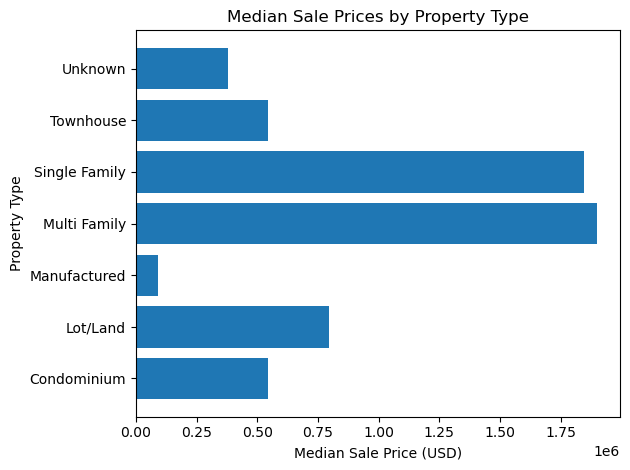

In [46]:
plt.barh(median_sale_price_by_property_type_df['Property Type'], median_sale_price_by_property_type_df['Median Sale Price (USD)'])
plt.xlabel('Median Sale Price (USD)')
plt.ylabel('Property Type')
plt.title('Median Sale Prices by Property Type')
plt.tight_layout()
plt.show()

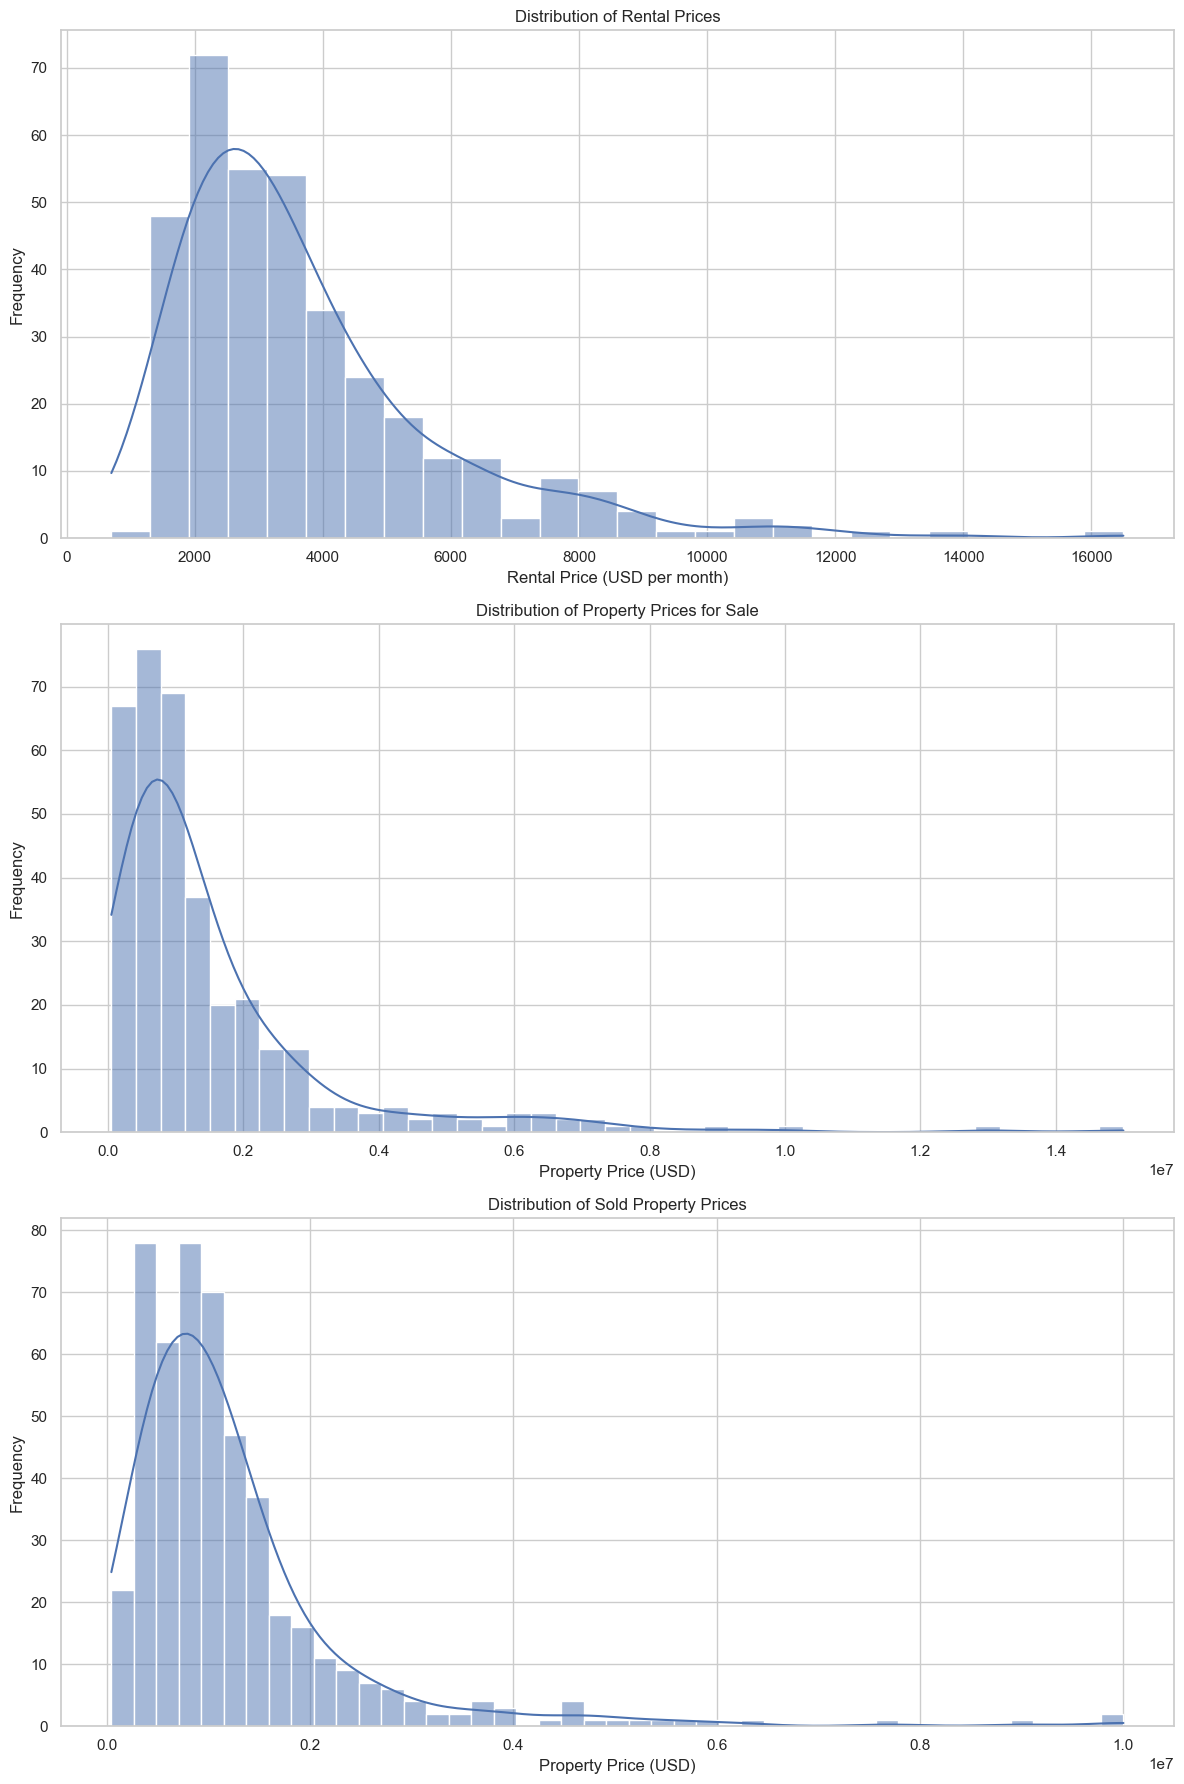

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot the distribution of rental prices
sns.histplot(forRentDF['Rental price (USD per month)'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Rental Prices')
axes[0].set_xlabel('Rental Price (USD per month)')
axes[0].set_ylabel('Frequency')

# Plot the distribution of property prices for sale
sns.histplot(forSaleDF['Property price (USD)'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Property Prices for Sale')
axes[1].set_xlabel('Property Price (USD)')
axes[1].set_ylabel('Frequency')

# Plot the distribution of sold property prices
sns.histplot(soldDF['Property price (USD)'].dropna(), kde=True, ax=axes[2])
axes[2].set_title('Distribution of Sold Property Prices')
axes[2].set_xlabel('Property Price (USD)')
axes[2].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [51]:
# Calculate the median listing home price per square foot
median_price_per_sqft = forSaleDF['Price per living area unit (USD)'].median()

print(f"Median Listing Home Price per Sq Ft: ${median_price_per_sqft:.2f}")

Median Listing Home Price per Sq Ft: $578.36


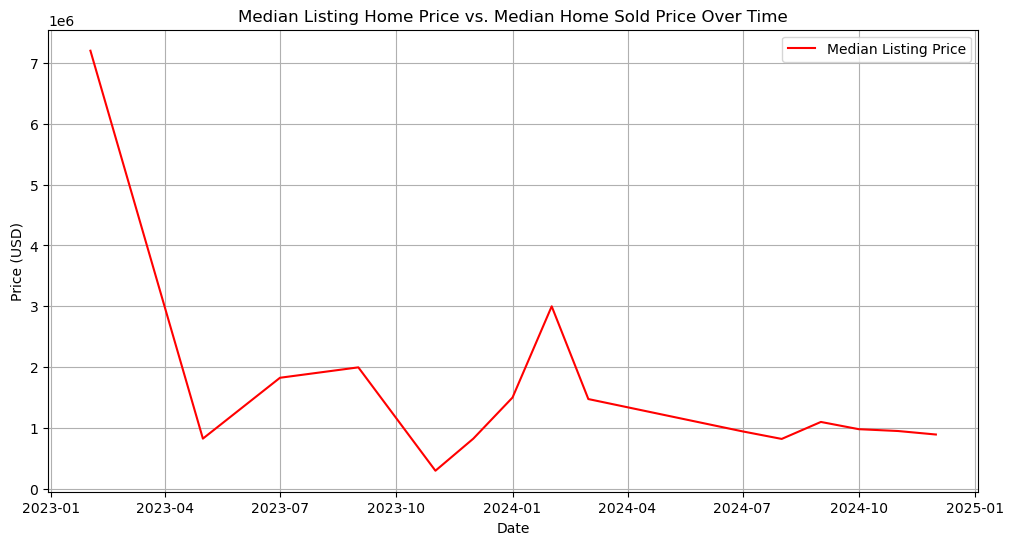

In [53]:
import matplotlib.pyplot as plt

# Convert the 'Sold date (MM/DD/YYYY)' column to datetime
soldDF['Sold date (MM/DD/YYYY)'] = pd.to_datetime(soldDF['Sold date (MM/DD/YYYY)'])

# Group by the sold date and calculate the median sold price
median_sold_price_overtime = soldDF.groupby(soldDF['Sold date (MM/DD/YYYY)'].dt.to_period('M'))['Property price (USD)'].median()

# Convert the 'Date listed (MM/DD/YYYY)' column to datetime
forSaleDF['Date listed (MM/DD/YYYY)'] = pd.to_datetime(forSaleDF['Date listed (MM/DD/YYYY)'])

# Group by the listed date and calculate the median listing price
median_listing_price_overtime = forSaleDF.groupby(forSaleDF['Date listed (MM/DD/YYYY)'].dt.to_period('M'))['Property price (USD)'].median()

# Plot the data
plt.figure(figsize=(12, 6))
# plt.plot(median_sold_price_overtime.index.to_timestamp(), median_sold_price_overtime.values, label='Median Sold Price')
plt.plot(median_listing_price_overtime.index.to_timestamp(), median_listing_price_overtime.values, label='Median Listing Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Median Listing Home Price vs. Median Home Sold Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

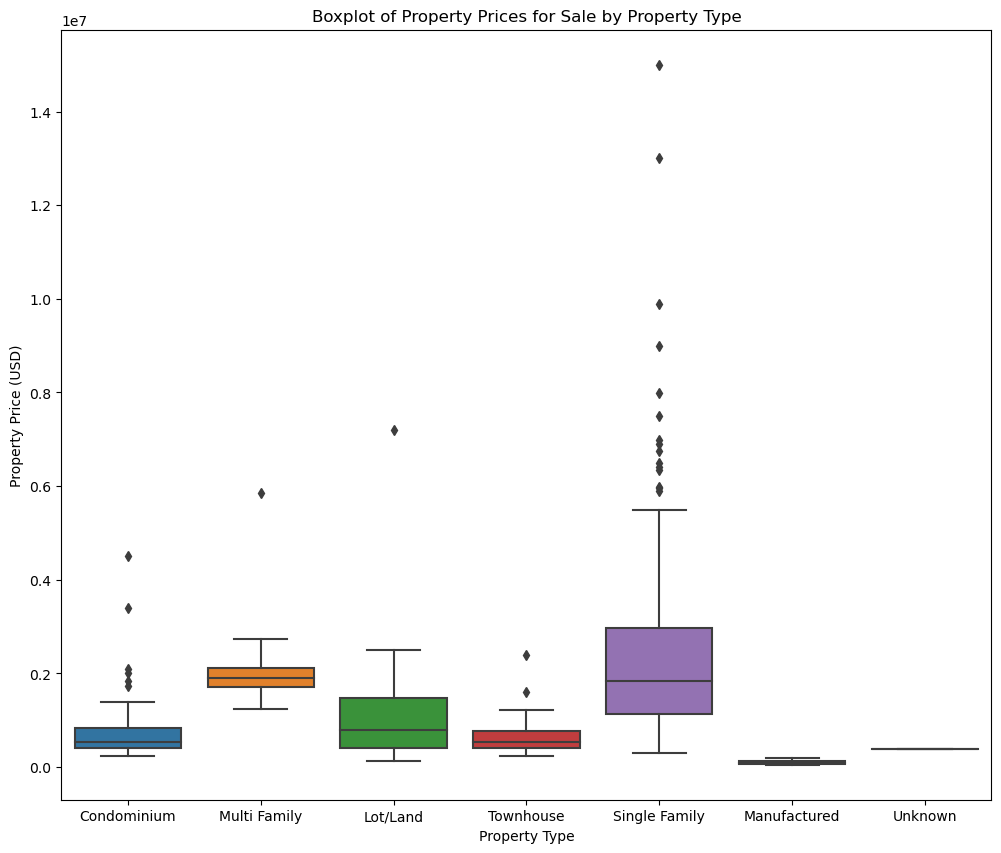

In [50]:
# Create a boxplot of property prices for each property type in the for sale listings
plt.figure(figsize=(12, 10))
sns.boxplot(x='Property type', y='Property price (USD)', data=forSaleDF)
plt.title('Boxplot of Property Prices for Sale by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Property Price (USD)')

plt.show()

# K-Means Clustering
K-means is a clustering method which is an unsupervised machine learning technique used to identify groups or clusters of data objects in a dataset. We will use this clustering method to see how recent property listings are similar and different on different variables. We will evaluate the clusters quantitatively and qualitatively in our analysis.

In [110]:
import warnings

warnings.filterwarnings('ignore')

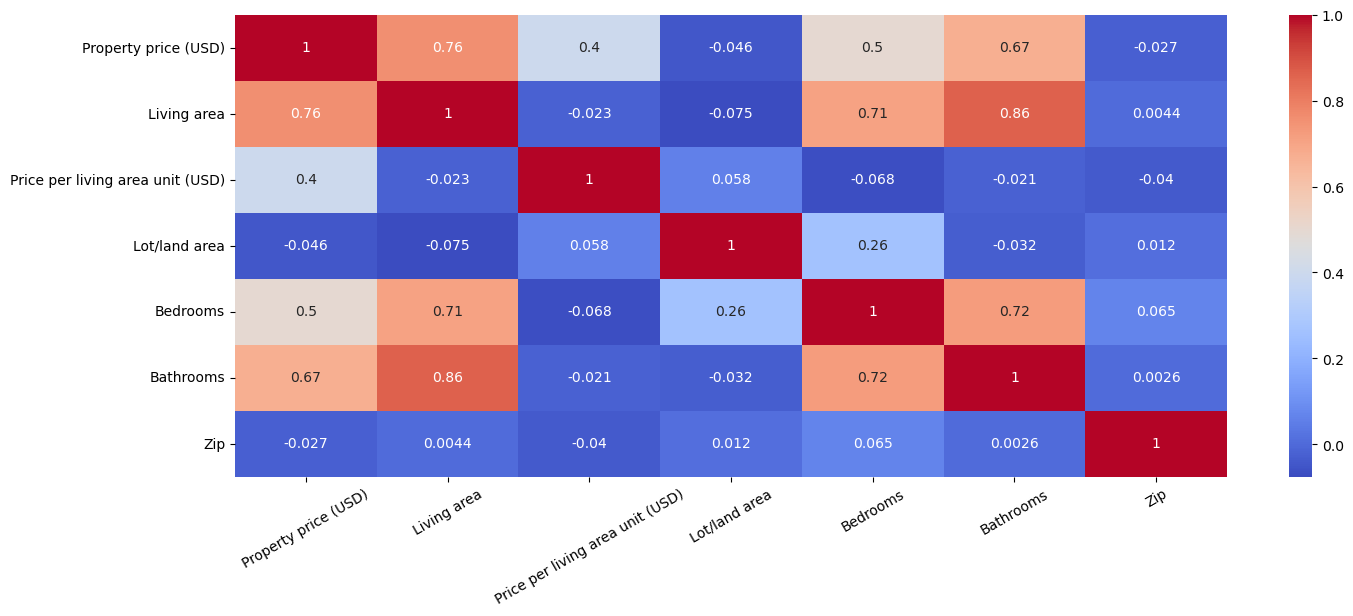

In [111]:
soldCorr = soldDF.corr()

# Create the heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(soldCorr, annot=True, cmap="coolwarm")
plt.xticks(rotation=30) # rotate the x axis labels for better readability
plt.show()

<Figure size 1200x800 with 0 Axes>

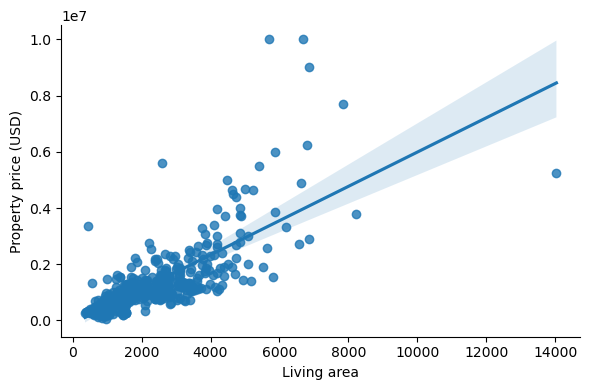

In [112]:
# create scatter plot with regression line using Seaborn's lmplot()
plt.figure(figsize=(12, 8))
sns.lmplot(data=soldDF, x="Living area", y="Property price (USD)",fit_reg=True, height=4, aspect=1.5)

In [113]:
# Select relevant columns
soldDF_selected = soldDF[['Property price (USD)', 'Living area', 'Price per living area unit (USD)', 'Lot/land area', 'Lot/land area unit', 'Bedrooms', 'Bathrooms']]

# Drop rows where 'Lot/land area' is null
soldDF_selected.dropna(subset=['Lot/land area'], inplace=True)

# Standardize the 'Lot/land area' column based on their unit into a new column
def standardize_lot_area(row):
    if row['Lot/land area unit'] == 'acres':
        return row['Lot/land area'] * 43560  # 1 acre = 43560 sqft
    else:
        return row['Lot/land area']

soldDF_selected['Lot/land area standardized (sqft)'] = soldDF_selected.apply(standardize_lot_area, axis=1)

soldDF_selected.drop(['Lot/land area', 'Lot/land area unit'], axis=1, inplace=True)

# Display the updated dataframe
soldDF_selected.head()

,Property price (USD),Living area,Price per living area unit (USD),Bedrooms,Bathrooms,Lot/land area standardized (sqft)
0,1150000,2029.0,566.78,3.0,3.0,8601.0
1,1900000,4400.0,431.82,5.0,4.0,10890.0
2,1191400,3130.0,380.64,3.0,4.0,5381.0
5,2735000,6565.0,416.60,6.0,5.0,13503.6
6,2650000,3635.0,729.02,3.0,4.0,2969.0


In [114]:
soldDF_selected.isnull().sum()

Property price (USD)                 0
Living area                          6
Price per living area unit (USD)     6
Bedrooms                             7
Bathrooms                            6
Lot/land area standardized (sqft)    0
dtype: int64

In [115]:
soldDF_selected.dropna(inplace=True)

soldDF_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 491
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Property price (USD)               343 non-null    int64  
 1   Living area                        343 non-null    float64
 2   Price per living area unit (USD)   343 non-null    float64
 3   Bedrooms                           343 non-null    float64
 4   Bathrooms                          343 non-null    float64
 5   Lot/land area standardized (sqft)  343 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 18.8 KB


Declare feature vector and target variable

In [116]:
# Define the feature vector and target variable
X = soldDF_selected.drop('Property price (USD)', axis=1)
y = soldDF_selected['Property price (USD)']

# Display the feature vector and target variable
print("Feature Vector (X):")
display(X.head())
print("\nTarget Variable (y):")
display(y.head())

Feature Vector (X):


,Living area,Price per living area unit (USD),Bedrooms,Bathrooms,Lot/land area standardized (sqft)
0,2029.0,566.78,3.0,3.0,8601.0
1,4400.0,431.82,5.0,4.0,10890.0
2,3130.0,380.64,3.0,4.0,5381.0
5,6565.0,416.60,6.0,5.0,13503.6
6,3635.0,729.02,3.0,4.0,2969.0



Target Variable (y):


0    1150000
1    1900000
2    1191400
5    2735000
6    2650000
Name: Property price (USD), dtype: int64

Since we are not yet incorporating categorical variables, we don't have to perform any more transformations.

### Feature Scaling

In [117]:
cols = X.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [118]:
X = pd.DataFrame(X, columns=[cols])

X.head()

,Living area,Price per living area unit (USD),Bedrooms,Bathrooms,Lot/land area standardized (sqft)
0,0.122092,0.204127,0.285714,0.222222,0.001219
1,0.295538,0.143403,0.571429,0.333333,0.001543
2,0.202634,0.120376,0.285714,0.333333,0.000762
3,0.453914,0.136555,0.714286,0.444444,0.001913
4,0.239576,0.277124,0.285714,0.333333,0.000421


### K-means model with two clusters

In [119]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [120]:
kmeans.cluster_centers_

array([[0.24379819, 0.19892763, 0.4961039 , 0.32289562, 0.01362681],
       [0.1049822 , 0.19927188, 0.25842697, 0.12453184, 0.0043438 ]])

In [121]:
kmeans.inertia_

16.126477919435644

Inertia is a measure of how internally coherent the clusters are. Specifically, it is the sum of squares within each cluster. 

Lower values indicate better models.

In [122]:
# Inverse the scaling to get the original data
X_original = ms.inverse_transform(X)
X_original = pd.DataFrame(X_original, columns=[cols])
X_original.head()

,Living area,Price per living area unit (USD),Bedrooms,Bathrooms,Lot/land area standardized (sqft)
0,2029.0,566.78,3.0,3.0,8601.0
1,4400.0,431.82,5.0,4.0,10890.0
2,3130.0,380.64,3.0,4.0,5381.0
3,6565.0,416.60,6.0,5.0,13503.6
4,3635.0,729.02,3.0,4.0,2969.0


In [123]:
X_original['Cluster'] = kmeans.labels_

X_original.head()

,Living area,Price per living area unit (USD),Bedrooms,Bathrooms,Lot/land area standardized (sqft),Cluster
0,2029.0,566.78,3.0,3.0,8601.0,1
1,4400.0,431.82,5.0,4.0,10890.0,0
2,3130.0,380.64,3.0,4.0,5381.0,0
3,6565.0,416.60,6.0,5.0,13503.6,0
4,3635.0,729.02,3.0,4.0,2969.0,0


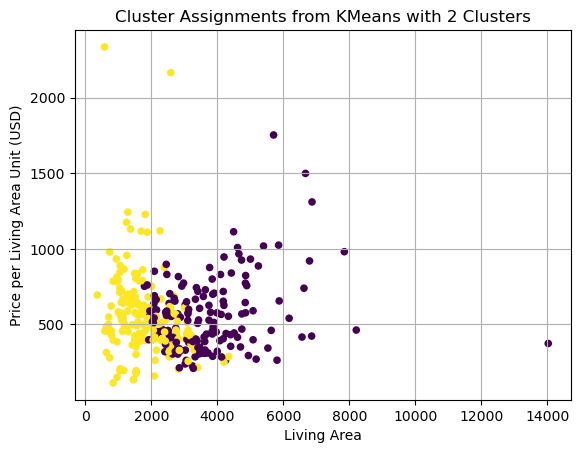

In [124]:
plt.scatter(X_original['Living area'], X_original['Price per living area unit (USD)'], c=X_original['Cluster'], cmap='viridis', s=20)
plt.title('Cluster Assignments from KMeans with 2 Clusters')
plt.xlabel('Living Area')
plt.ylabel('Price per Living Area Unit (USD)')
plt.grid()
plt.show()

### Elbow Plot to Find Optimal Number of Clusters

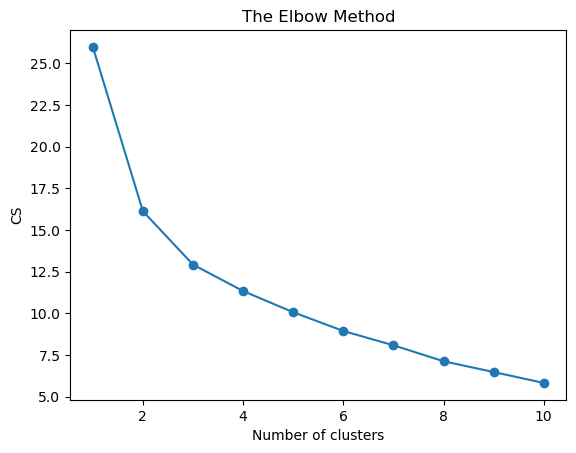

In [125]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, marker='o',)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

From this elbow plot, it appears that the optimal number of clusters is **3**. After this point, the within-cluster sum of squares (WCSS) doesn't significantly improve with more clusters.


Let's rerun the algorithm with 3 clusters.

In [126]:
kmeans_3 = KMeans(n_clusters=3, random_state=0) 

kmeans_3.fit(X)

kmeans_3.inertia_

12.925136466260799

This is a significant improvement from our original model that used n=2 clusters. Let's visualize the cluster assignments.

In [127]:
# Inverse the scaling to get the original data
X_original = ms.inverse_transform(X)
X_original = pd.DataFrame(X_original, columns=[cols])
X_original.head()

,Living area,Price per living area unit (USD),Bedrooms,Bathrooms,Lot/land area standardized (sqft)
0,2029.0,566.78,3.0,3.0,8601.0
1,4400.0,431.82,5.0,4.0,10890.0
2,3130.0,380.64,3.0,4.0,5381.0
3,6565.0,416.60,6.0,5.0,13503.6
4,3635.0,729.02,3.0,4.0,2969.0


In [128]:
X_original['Cluster'] = kmeans_3.labels_

X_original.head()

,Living area,Price per living area unit (USD),Bedrooms,Bathrooms,Lot/land area standardized (sqft),Cluster
0,2029.0,566.78,3.0,3.0,8601.0,0
1,4400.0,431.82,5.0,4.0,10890.0,2
2,3130.0,380.64,3.0,4.0,5381.0,0
3,6565.0,416.60,6.0,5.0,13503.6,2
4,3635.0,729.02,3.0,4.0,2969.0,0


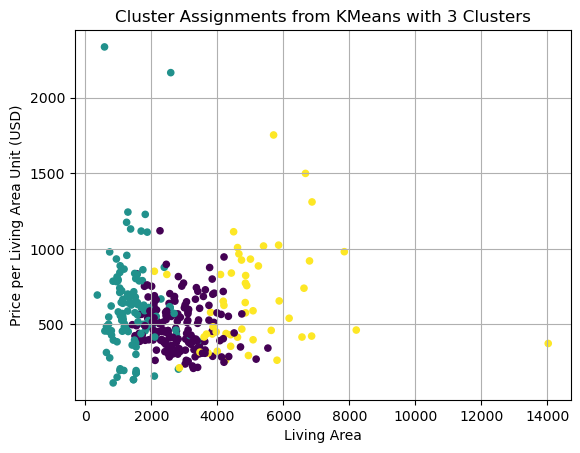

In [129]:
plt.scatter(X_original['Living area'], X_original['Price per living area unit (USD)'], c=X_original['Cluster'], cmap='viridis', s=20)
plt.title('Cluster Assignments from KMeans with 3 Clusters')
plt.xlabel('Living Area')
plt.ylabel('Price per Living Area Unit (USD)')
plt.grid()
plt.show()